In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re # for regular expression
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download([
    "stopwords",
    "punkt",
    "wordnet",
    "omw-1.4",
    "vader_lexicon"
])
%matplotlib inline
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
hotel_review = pd.read_csv("data/tourist_accommodation_reviews.csv")

In [3]:
hotel_review .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53644 entries, 0 to 53643
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     53644 non-null  object
 1   Review Date            53644 non-null  object
 2   Location               53644 non-null  object
 3   Hotel/Restaurant name  53644 non-null  object
 4   Review                 53644 non-null  object
dtypes: object(5)
memory usage: 2.0+ MB


In [4]:
hotel_review.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...


In [5]:
hotel_review.shape

(53644, 5)

In [6]:
# List of all the locationts available
hotel_review["Location"].value_counts().index 

Index([' Patong', ' Karon', ' Kata Beach', ' Rawai', ' Choeng Thale',
       ' Phuket Town', ' Kamala', ' Mai Khao', ' Cape Panwa', ' Chalong',
       ' Thalang District', ' Kathu', ' Nai Yang', ' Nai Harn',
       ' Bang Tao Beach', ' Karon Beach', ' Wichit', ' Talat Yai', ' Koh Kaew',
       ' Kata Noi Beach', ' Pa Khlok', ' Ratsada', ' Talat Nuea', ' Nai Thon',
       ' Sakhu'],
      dtype='object')

In [7]:
# Picking two locations that interest me
location = [" Rawai", " Karon"] 

In [8]:
location_review = hotel_review["Location"].isin(location) # reviews for the two locations

In [9]:
location_review

0        False
1        False
2        False
3        False
4        False
         ...  
53639    False
53640    False
53641    False
53642    False
53643    False
Name: Location, Length: 53644, dtype: bool

In [10]:
locations_hotels = hotel_review[location_review]

In [11]:
locations_hotels

,ID,Review Date,Location,Hotel/Restaurant name,Review
200,rn580748664,Reviewed 4 days ago,Rawai,Green Tamarind Kitchen,"If you want the best burger in Phuket, look no..."
201,rn579783154,Reviewed 1 week ago,Rawai,Green Tamarind Kitchen,"I have been here a couple of times now,and hav..."
202,rn579651071,Reviewed 1 week ago,Rawai,Green Tamarind Kitchen,This place is amazing! Burgers are delicious! ...
203,rn574834726,Reviewed 4 weeks ago,Rawai,Green Tamarind Kitchen,This is a must when in Phuket. Their burgers r...
204,rn574713927,Reviewed 4 weeks ago,Rawai,Green Tamarind Kitchen,The reviews speak for themselves. This is main...
...,...,...,...,...,...
53343,rn496540215,"Reviewed June 27, 2017",Karon,Khan Baba phuket,I Oder fried rice with shrimp..taste is not go...
53344,rn493943056,"Reviewed June 18, 2017",Karon,Khan Baba phuket,"From the food, to the service to the price, it..."
53345,rn483183767,"Reviewed May 10, 2017",Karon,Khan Baba phuket,If you are looking for good halal food in Phuk...
53346,rn473586498,"Reviewed April 8, 2017",Karon,Khan Baba phuket,I don't recommend this restaurant to anyone wo...


In [12]:
# The hotels or restuarants at these locations with their total 
locations_hotels["Hotel/Restaurant name"].value_counts() 

Green Tamarind Kitchen                      100
Angus O'Tool's Irish Pub                    100
Baan Sailom Restaurant                      100
Kata Villa Restaurant                       100
Louis' Kitchen                              100
                                           ... 
Rossovivo Ristorante Italiano E Pizzeria     93
Khun Pha                                     93
Da Mario                                     92
Tokyo Japanese Restaurant                    92
Red Chopsticks At Patong                     91
Name: Hotel/Restaurant name, Length: 98, dtype: int64

In [13]:
# individual name of all the hotels/resturants
locations_hotels["Hotel/Restaurant name"].value_counts().index 

Index(['Green Tamarind Kitchen', 'Angus O'Tool's Irish Pub',
       'Baan Sailom Restaurant', 'Kata Villa Restaurant', 'Louis' Kitchen',
       'Rum Jungle', 'Red Chopsticks', 'Mando Restaurant & Steakhouse',
       'Atsumi Raw Cafe', 'Bamboo Kitchen', 'Food Market Kata',
       'COCONUT Bar & Restaurant - Rawai Beach', 'The Palm Cuisine',
       'Aussie Pub Kamala', 'Mamasita Mexican', 'PaPa Restaurant',
       'Coral Restaurant', 'O-Oh Farm Karon', 'Capri Noi Restaurant',
       'Ann Restaurant', 'Mint', 'Nikitas Beach Restaurant',
       'Sansabai restaurant', 'Hooters Phuket',
       'Wine Connection Deli & Bistro - Chalong, Phuket',
       'Lucky 13 Sandwich Rawai', 'Buffalo Steak House - Karon Beach',
       'D Wine Italian Bistro & Wine Bar', 'El Gaucho Steakhouse',
       'Da Mario Karon', 'Mare Italian Restaurant', 'Vitaporn',
       'Butterfly Bistro', '2gether Restaurant', 'Ying Restaurant', 'Nami',
       'Ging Restaurant', 'Three Crowns Restaurant & Grill',
       'A Spoon

In [14]:
#The total numbers of all hotels or restuarants in the locations
len(locations_hotels["Hotel/Restaurant name"].value_counts().index) 

98

In [15]:
# Get the number of distint or unique hotels
len(locations_hotels["Hotel/Restaurant name"].unique())

98

In [16]:
# Randomly picking 30 hotels/Resturants from the total
# seeding my random to always give the ramdomly picked hotels/resturant
np.random.seed(30) 
np.random.choice(locations_hotels["Hotel/Restaurant name"].unique(), 30, replace= False)

array(['Churrasco Phuket Steakhouse', 'Navrang Mahal', 'O-Oh Farm Karon',
       'Mamasita Mexican', 'The Islander', 'Flip Side',
       'Two Chefs - Karon Beach', 'Surin Bay Inn Restaurant',
       'Mare Italian Restaurant', 'Food Market Kata', 'Da Mario',
       'Kata Villa Restaurant', 'Green Tamarind Kitchen',
       "Bob's Restaurant & Bar", 'Delish Cafe',
       'Wine Connection Deli & Bistro - Chalong, Phuket',
       'El Gaucho Steakhouse', 'Chez Bernard', 'Mookdee Seafood',
       'Kalika 76 Restaurant', 'Pinto', 'O-OH Farm Ta-Eiad',
       'Tokyo Japanese Restaurant', 'Coral Restaurant',
       'The Palm Cuisine', 'PaPa Restaurant', 'Restaurant La Croisette',
       "Hakan's Bar & Restaurant",
       'COCONUT Bar & Restaurant - Rawai Beach', 'The Green Man Pub'],
      dtype=object)

In [17]:
# Getting same 30 all the time
len(np.random.choice(locations_hotels["Hotel/Restaurant name"].unique(), 30, replace= False))

30

In [18]:
# Assign it to variable
hotels_30 = np.random.choice(locations_hotels["Hotel/Restaurant name"].unique(), 30, replace= False)

In [19]:
#Confirm the 30 hotels from the original dataset
selected_hotels_resturants = hotel_review[hotel_review["Hotel/Restaurant name"].isin(hotels_30)]

In [20]:
selected_hotels_resturants

,ID,Review Date,Location,Hotel/Restaurant name,Review
200,rn580748664,Reviewed 4 days ago,Rawai,Green Tamarind Kitchen,"If you want the best burger in Phuket, look no..."
201,rn579783154,Reviewed 1 week ago,Rawai,Green Tamarind Kitchen,"I have been here a couple of times now,and hav..."
202,rn579651071,Reviewed 1 week ago,Rawai,Green Tamarind Kitchen,This place is amazing! Burgers are delicious! ...
203,rn574834726,Reviewed 4 weeks ago,Rawai,Green Tamarind Kitchen,This is a must when in Phuket. Their burgers r...
204,rn574713927,Reviewed 4 weeks ago,Rawai,Green Tamarind Kitchen,The reviews speak for themselves. This is main...
...,...,...,...,...,...
53343,rn496540215,"Reviewed June 27, 2017",Karon,Khan Baba phuket,I Oder fried rice with shrimp..taste is not go...
53344,rn493943056,"Reviewed June 18, 2017",Karon,Khan Baba phuket,"From the food, to the service to the price, it..."
53345,rn483183767,"Reviewed May 10, 2017",Karon,Khan Baba phuket,If you are looking for good halal food in Phuk...
53346,rn473586498,"Reviewed April 8, 2017",Karon,Khan Baba phuket,I don't recommend this restaurant to anyone wo...


In [21]:
selected_hotels_resturants.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
200,rn580748664,Reviewed 4 days ago,Rawai,Green Tamarind Kitchen,"If you want the best burger in Phuket, look no..."
201,rn579783154,Reviewed 1 week ago,Rawai,Green Tamarind Kitchen,"I have been here a couple of times now,and hav..."
202,rn579651071,Reviewed 1 week ago,Rawai,Green Tamarind Kitchen,This place is amazing! Burgers are delicious! ...
203,rn574834726,Reviewed 4 weeks ago,Rawai,Green Tamarind Kitchen,This is a must when in Phuket. Their burgers r...
204,rn574713927,Reviewed 4 weeks ago,Rawai,Green Tamarind Kitchen,The reviews speak for themselves. This is main...


In [22]:
selected_hotels_resturants.shape

(2941, 5)

In [23]:
# selectiong the needed columns and reset the index for ordering
needed_columns = ["Hotel/Restaurant name", "Review"]
hotels_resturants_30_reviews = selected_hotels_resturants[needed_columns].reset_index(drop=True)

In [24]:
hotels_resturants_30_reviews

,Hotel/Restaurant name,Review
0,Green Tamarind Kitchen,"If you want the best burger in Phuket, look no..."
1,Green Tamarind Kitchen,"I have been here a couple of times now,and hav..."
2,Green Tamarind Kitchen,This place is amazing! Burgers are delicious! ...
3,Green Tamarind Kitchen,This is a must when in Phuket. Their burgers r...
4,Green Tamarind Kitchen,The reviews speak for themselves. This is main...
...,...,...
2936,Khan Baba phuket,I Oder fried rice with shrimp..taste is not go...
2937,Khan Baba phuket,"From the food, to the service to the price, it..."
2938,Khan Baba phuket,If you are looking for good halal food in Phuk...
2939,Khan Baba phuket,I don't recommend this restaurant to anyone wo...


In [25]:
# Counting the total number of hotels 
hotels_resturants_30_reviews["Hotel/Restaurant name"].value_counts()

Green Tamarind Kitchen               100
Churrasco Phuket Steakhouse          100
Nikitas Beach Restaurant             100
Mint                                 100
Angus O'Tool's Irish Pub             100
The Palm Cuisine                     100
D Wine Italian Bistro & Wine Bar     100
PaPa Restaurant                      100
Vitaporn                             100
The Green Man Pub                    100
Karlsson Restaurant & Steak House    100
Schlusslicht                         100
Three Crowns Restaurant & Grill      100
A Spoonful of Sugar                  100
O-OH Farm Ta-Eiad                    100
Pad Thai Shop                        100
Tandoori Flames                      100
Pasha Kebab                           99
Delish Cafe                           99
Subparod Restaurant                   97
Mookdee Seafood                       97
Moo Restaurant                        97
Khan Baba phuket                      97
Coast Beach Club & Bistro Phuket      95
Jao Jong Seafood

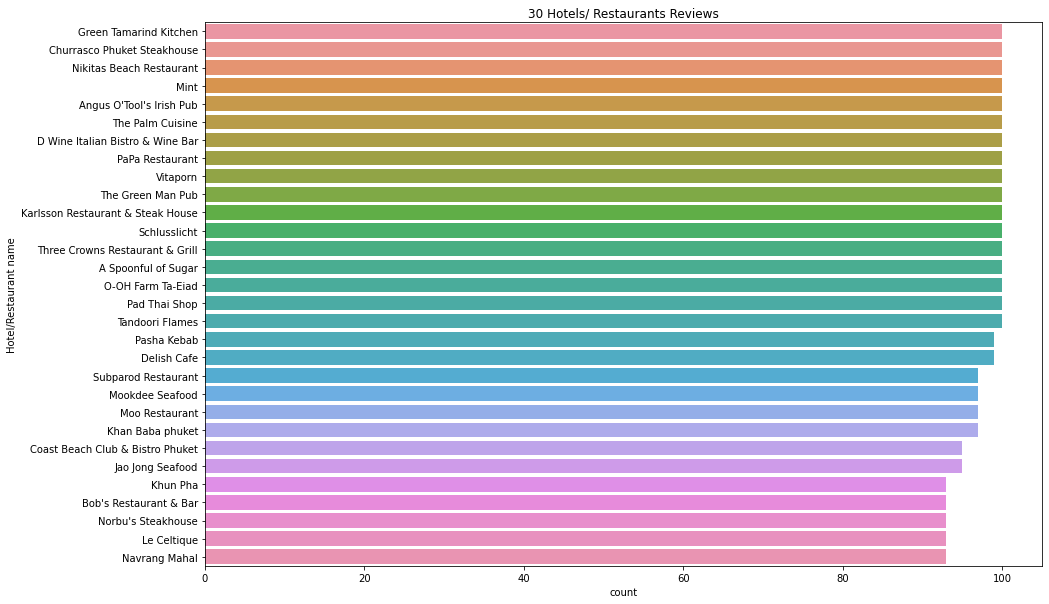

In [26]:
# Visualise
plt.figure(figsize=(15, 10))
sns.countplot(y = "Hotel/Restaurant name", data = hotels_resturants_30_reviews,
             order = hotels_resturants_30_reviews["Hotel/Restaurant name"].value_counts().index)
plt.title("30 Hotels/ Restaurants Reviews")
plt.show()

In [27]:
# Initialised stop words english version
stop_words = nltk.corpus.stopwords.words('english')

In [28]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [29]:
len(stop_words)

179

In [30]:
# Helper function that will do all my preprocessing on my dataset using stemming
# Function for cleaning my text data
# that extract only alphabet using the nltk package 
# And return the extracted aplhabet 
# convert to lower case
# stemmazied by removing regualar words from the stop_words
def preprocess_text(text):
    tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text) 
    cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words]
    #cleaned_tokens = ' '.join([word for word in cleaned_tokens.split() if word not in stop_words])
    stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]
    return stemmed_text

In [31]:
# applying the function on the dataset
# To creating a new column for the clean reviews
hotels_resturants_30_reviews.loc[:, "processed_review"] = hotels_resturants_30_reviews.loc[:, "Review"].apply(preprocess_text)

In [32]:
hotels_resturants_30_reviews.head()

,Hotel/Restaurant name,Review,processed_review
0,Green Tamarind Kitchen,"If you want the best burger in Phuket, look no...","[want, best, burger, phuket, look, peopl, tell..."
1,Green Tamarind Kitchen,"I have been here a couple of times now,and hav...","[coupl, time, mix, expieri, seem, right, perso..."
2,Green Tamarind Kitchen,This place is amazing! Burgers are delicious! ...,"[place, amaz, burger, delici, high, recommend,..."
3,Green Tamarind Kitchen,This is a must when in Phuket. Their burgers r...,"[must, phuket, burger, rank, top, worldwid, se..."
4,Green Tamarind Kitchen,The reviews speak for themselves. This is main...,"[review, speak, mainli, reason, went, disappoi..."


In [33]:
count_vectorizer = CountVectorizer(stop_words="english")

In [34]:
cv_data_reviews = count_vectorizer.fit_transform(hotels_resturants_30_reviews["processed_review"].map(' '.join))

In [35]:
cv_data_reviews = pd.DataFrame(cv_data_reviews.toarray(), columns = count_vectorizer.get_feature_names())

In [36]:
cv_data_reviews.head()

,00,000,0080,0081,0082,0083,0084,0087,008a,008b,...,younger,youvwil,yum,yummi,yummiest,yummo,zealand,zesti,zing,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
Top_15 = cv_data_reviews.sum(axis=0).sort_values(ascending=False).head(15)

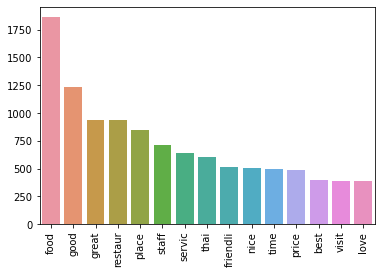

In [38]:
# plot the corpus
sns.barplot(x = Top_15.index, y = Top_15.values)
plt.xticks(rotation = 90)
plt.show()

## Using word cloud to show how it appears on corpus

In [39]:
hotels_resturants_30_reviews["processed_review"]

0       [want, best, burger, phuket, look, peopl, tell...
1       [coupl, time, mix, expieri, seem, right, perso...
2       [place, amaz, burger, delici, high, recommend,...
3       [must, phuket, burger, rank, top, worldwid, se...
4       [review, speak, mainli, reason, went, disappoi...
                              ...                        
2936    [oder, fri, rice, shrimp, tast, good, price, h...
2937    [food, servic, price, unpleas, place, read, re...
2938    [look, good, halal, food, phuket, come, safe, ...
2939    [recommend, restaur, anyon, worst, food, servi...
2940    [worst, indian, food, naan, bread, worst, one,...
Name: processed_review, Length: 2941, dtype: object

In [40]:
all_reviews_word = ' '.join(' '.join(i) for i in hotels_resturants_30_reviews["processed_review"])
#''.join(''.join(l) for l in my_list)

In [41]:
def display_cloud(wc):
    plt.figure(figsize=(12,6))
    plt.imshow(wc, interpolation="bilinear")
    plt.title("Frequetly Used Words")
    plt.axis("off")
    plt.show()

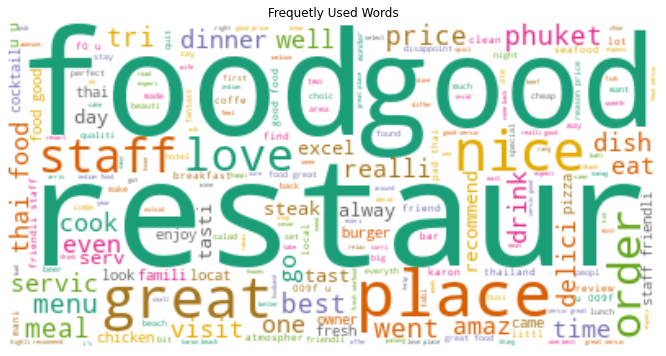

In [42]:
word_cloud = WordCloud(background_color="white", colormap="Dark2", 
               collocations=True, 
               random_state=42, ).generate(all_reviews_word)
display_cloud(word_cloud)

### Sentiment Analysis Classification

In [43]:
sentiment = SentimentIntensityAnalyzer()

In [44]:
hotels_resturants_30_reviews["compound"] = [sentiment.polarity_scores(review)["compound"] for review in hotels_resturants_30_reviews["Review"]]
hotels_resturants_30_reviews["neg"] = [sentiment.polarity_scores(review)["neg"] for review in hotels_resturants_30_reviews["Review"]]
hotels_resturants_30_reviews["pos"] = [sentiment.polarity_scores(review)["pos"] for review in hotels_resturants_30_reviews["Review"]]
hotels_resturants_30_reviews["neu"] = [sentiment.polarity_scores(review)["neu"] for review in hotels_resturants_30_reviews["Review"]]


In [45]:
hotels_resturants_30_reviews

,Hotel/Restaurant name,Review,processed_review,compound,neg,pos,neu
0,Green Tamarind Kitchen,"If you want the best burger in Phuket, look no...","[want, best, burger, phuket, look, peopl, tell...",0.9381,0.040,0.304,0.656
1,Green Tamarind Kitchen,"I have been here a couple of times now,and hav...","[coupl, time, mix, expieri, seem, right, perso...",0.0000,0.000,0.000,1.000
2,Green Tamarind Kitchen,This place is amazing! Burgers are delicious! ...,"[place, amaz, burger, delici, high, recommend,...",0.8800,0.000,0.404,0.596
3,Green Tamarind Kitchen,This is a must when in Phuket. Their burgers r...,"[must, phuket, burger, rank, top, worldwid, se...",0.6908,0.000,0.168,0.832
4,Green Tamarind Kitchen,The reviews speak for themselves. This is main...,"[review, speak, mainli, reason, went, disappoi...",-0.1280,0.058,0.047,0.896
...,...,...,...,...,...,...,...
2936,Khan Baba phuket,I Oder fried rice with shrimp..taste is not go...,"[oder, fri, rice, shrimp, tast, good, price, h...",0.3065,0.038,0.066,0.896
2937,Khan Baba phuket,"From the food, to the service to the price, it...","[food, servic, price, unpleas, place, read, re...",-0.8555,0.198,0.000,0.802
2938,Khan Baba phuket,If you are looking for good halal food in Phuk...,"[look, good, halal, food, phuket, come, safe, ...",0.5848,0.076,0.151,0.773
2939,Khan Baba phuket,I don't recommend this restaurant to anyone wo...,"[recommend, restaur, anyon, worst, food, servi...",-0.8485,0.456,0.000,0.544


In [46]:
hotels_resturants_30_reviews[["compound", "neg", "pos", "neu"]]

,compound,neg,pos,neu
0,0.9381,0.040,0.304,0.656
1,0.0000,0.000,0.000,1.000
2,0.8800,0.000,0.404,0.596
3,0.6908,0.000,0.168,0.832
4,-0.1280,0.058,0.047,0.896
...,...,...,...,...
2936,0.3065,0.038,0.066,0.896
2937,-0.8555,0.198,0.000,0.802
2938,0.5848,0.076,0.151,0.773
2939,-0.8485,0.456,0.000,0.544


In [47]:
hotels_resturants_30_reviews[["compound", "neg", "pos", "neu"]].describe()

,compound,neg,pos,neu
count,2941.000000,2941.000000,2941.000000,2941.000000
mean,0.667983,0.026172,0.234224,0.739604
std,0.411290,0.050998,0.135299,0.127123
min,-0.966200,0.000000,0.000000,0.277000
25%,0.592700,0.000000,0.136000,0.656000
50%,0.848100,0.000000,0.226000,0.749000
75%,0.928000,0.041000,0.325000,0.831000
max,0.990700,0.456000,0.723000,1.000000


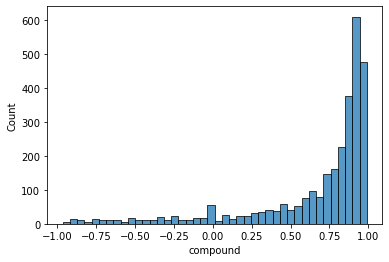

In [48]:
sns.histplot(hotels_resturants_30_reviews["compound"]) # strong positice sentiment
plt.show()

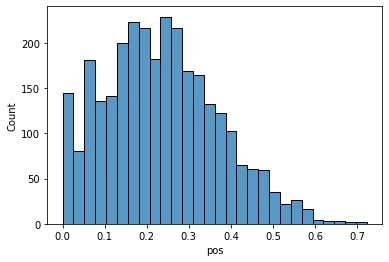

In [49]:
sns.histplot(hotels_resturants_30_reviews["pos"])
plt.show()

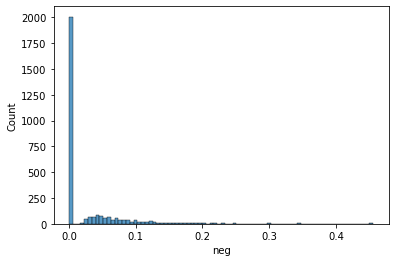

In [50]:
sns.histplot(hotels_resturants_30_reviews["neg"])
plt.show()

In [51]:
#hotels_resturants_30_reviews["processes_review"] = hotels_resturants_30_reviews["Review"].apply(preprocess_text)

In [52]:
pos_rev_part = hotels_resturants_30_reviews.loc[hotels_resturants_30_reviews["compound"] > 0]

In [53]:
pos_rev_part.head()

,Hotel/Restaurant name,Review,processed_review,compound,neg,pos,neu
0,Green Tamarind Kitchen,"If you want the best burger in Phuket, look no...","[want, best, burger, phuket, look, peopl, tell...",0.9381,0.04,0.304,0.656
2,Green Tamarind Kitchen,This place is amazing! Burgers are delicious! ...,"[place, amaz, burger, delici, high, recommend,...",0.8800,0.00,0.404,0.596
3,Green Tamarind Kitchen,This is a must when in Phuket. Their burgers r...,"[must, phuket, burger, rank, top, worldwid, se...",0.6908,0.00,0.168,0.832
5,Green Tamarind Kitchen,Fancied a change from Thai food and had been t...,"[fanci, chang, thai, food, told, place, excel,...",0.9312,0.00,0.309,0.691
7,Green Tamarind Kitchen,"Restaurant open at five pm, as soon it open it...","[restaur, open, five, pm, soon, open, fill, cu...",0.7759,0.00,0.159,0.841


In [54]:
neg_rev_part  = hotels_resturants_30_reviews.loc[hotels_resturants_30_reviews["compound"] <= 0]

In [55]:
neg_rev_part.head()

,Hotel/Restaurant name,Review,processed_review,compound,neg,pos,neu
1,Green Tamarind Kitchen,"I have been here a couple of times now,and hav...","[coupl, time, mix, expieri, seem, right, perso...",0.0000,0.000,0.000,1.000
4,Green Tamarind Kitchen,The reviews speak for themselves. This is main...,"[review, speak, mainli, reason, went, disappoi...",-0.1280,0.058,0.047,0.896
6,Green Tamarind Kitchen,"Limited parking is available opposite, but get...","[limit, park, avail, opposit, get, earli, avoi...",-0.0414,0.131,0.096,0.773
27,Green Tamarind Kitchen,I've been in Asia for 7 years and have had bet...,"[i'v, asia, 7, year, better, burger, can't, sa...",-0.7650,0.156,0.040,0.804
43,Green Tamarind Kitchen,Well done guys met a friend here from the USA ...,"[well, done, guy, met, friend, usa, home, burg...",-0.3339,0.166,0.159,0.675


In [56]:
neg_token = [word for review in neg_rev_part['processed_review'] for word in review]

In [57]:
pos_rev_part.head()

,Hotel/Restaurant name,Review,processed_review,compound,neg,pos,neu
0,Green Tamarind Kitchen,"If you want the best burger in Phuket, look no...","[want, best, burger, phuket, look, peopl, tell...",0.9381,0.04,0.304,0.656
2,Green Tamarind Kitchen,This place is amazing! Burgers are delicious! ...,"[place, amaz, burger, delici, high, recommend,...",0.8800,0.00,0.404,0.596
3,Green Tamarind Kitchen,This is a must when in Phuket. Their burgers r...,"[must, phuket, burger, rank, top, worldwid, se...",0.6908,0.00,0.168,0.832
5,Green Tamarind Kitchen,Fancied a change from Thai food and had been t...,"[fanci, chang, thai, food, told, place, excel,...",0.9312,0.00,0.309,0.691
7,Green Tamarind Kitchen,"Restaurant open at five pm, as soon it open it...","[restaur, open, five, pm, soon, open, fill, cu...",0.7759,0.00,0.159,0.841


In [58]:
pos_token = [word for review in pos_rev_part['processed_review'] for word in review]

In [59]:
from nltk.probability import FreqDist

In [60]:
neg_freqdist = FreqDist(neg_token)

In [61]:
neg_freqdist.tabulate(10)

   food restaur   order   place    good  servic    thai    time    went   price 
    169     118      73      67      65      59      54      52      47      37 


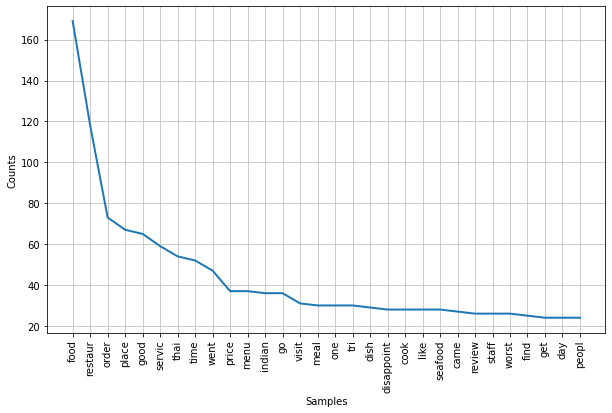

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [62]:
plt.figure(figsize=(10,6))
neg_freqdist.plot(30)

In [63]:
pos_freqdist = FreqDist(pos_token)

In [64]:
pos_freqdist.tabulate(10)

    food     good    great  restaur    place    staff   servic     thai friendli        u 
    1695     1170      919      818      781      690      583      546      503      488 


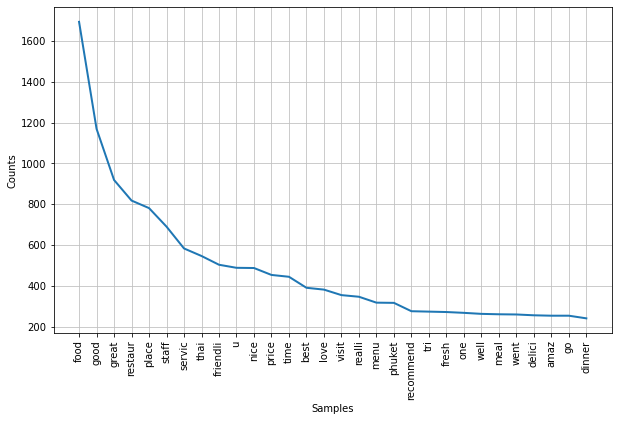

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [65]:
plt.figure(figsize=(10,6))
pos_freqdist.plot(30)